In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("HousePricePrediction.xlsx - Sheet1.csv")

# Printing first 5 records of the dataset
dataset.head(5)


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


description of the data :
1	Id	To count the records.
2	MSSubClass	 Identifies the type of dwelling involved in the sale.
3	MSZoning	Identifies the general zoning classification of the sale.
4	LotArea	 Lot size in square feet.
5	LotConfig	Configuration of the lot
6	BldgType	Type of dwelling
7	OverallCond	Rates the overall condition of the house
8	YearBuilt	Original construction year
9	YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).
10	Exterior1st	Exterior covering on house
11	BsmtFinSF2	Type 2 finished square feet.
12	TotalBsmtSF	Total square feet of basement area
13	SalePrice	To be predicted

In [2]:
#As we have imported the data. So shape method will show us the dimension of the dataset. 
dataset.shape


(2919, 13)

In [3]:
#Data Preprocessing
#Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


# EDA 
check for multicolinearity

<AxesSubplot:>

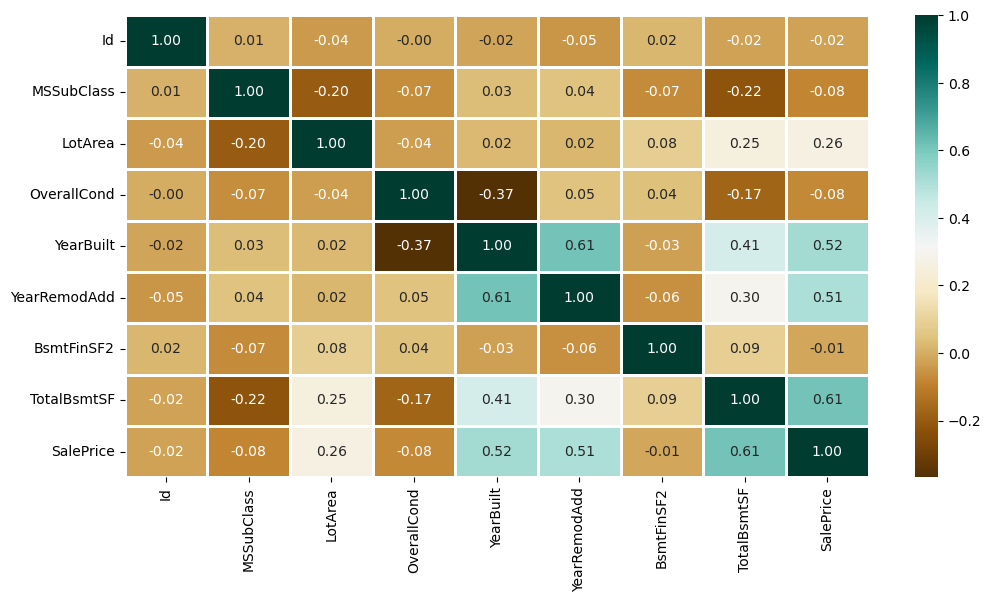

In [4]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)
# no significant multicolinearity

In [5]:
dataset.drop(['Id'], axis=1, inplace=True) # drop 'Id'


In [6]:
#Replacing SalePrice empty values with their mean values to make the data distribution symmetric
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())


In [7]:
new_dataset = dataset.dropna() #Drop records with null values (as the empty records are very less)

In [8]:
new_dataset.isnull().sum() # check null val --> no null values

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### OneHotEncoder – For Label categorical features

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)


Linear Regression
Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc. 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599951
